In [184]:
# importing nessery libraries:
import numpy as np
import matplotlib.pyplot as plt

In [185]:
# the Kalman filter for 10 steps.
n_steps = 10
# At time k = 0, E[r(0)] = 20... 
Er0 = 20 
# with uncertainty Var[r(0)] = 25.
uncertainty_Vr0 = 25 
# d(k) = 10 for all k ≥ 0.
dk = 10 
# The consumer is predicted to use a supply m = 7
m = 7 
# since d(k) = 10 for all k ≥ 0 and The consumer is predicted to use a supply m = 7...
# then uf will always be:
uf = dk - m
# process uncertainty is Var [v(k)] = 9.
process_uncertainty = 9 
# sensor uncertainty is Var [w(k)] = 25.
sensor_uncertainty = 25 
# We receive the following sequence of measurements z(k):
measurements = [17.8, 22.6, 30.2, 37.3, 46.2, 49.5, 44.6, 50.3, 56.3, 51.6]

In [186]:
water_volume = np.zeros([n_steps+1]) # to store the actual volume of water.
water_volume[0] = Er0 # since E[r(0)] = 20 at time k = 0.

uncertainty = np.zeros([n_steps+1]) # to provide the associated uncertainty for my estimate.
uncertainty[0] = uncertainty_Vr0 # since Var[r(0)] = 25 at time k = 0.

In [187]:
d = np.mat([[1]]) # dynamic

mm = np.mat([[1]]) # measurement model

mnv = np.mat([[25]]) # measurement noise variance

In [188]:
for k in range(1,n_steps+1):
    
    Kp = uf + d*Er0
    K_uncertainty = sensor_uncertainty * (d**2) + process_uncertainty

    measurement = measurements[k-1]
    
    K = K_uncertainty @ mm.T @ np.linalg.inv(mm @ K_uncertainty @ mm.T + mnv)
    Er0 = Kp + K @ (measurement - mm @ Kp)
    sensor_uncertainty = (np.eye(1) - K @ mm) @ K_uncertainty @ (np.eye(1) - K @ mm).T + K @ mnv @ K.T

    water_volume[k] = Er0[0]
   
    uncertainty[k] = sensor_uncertainty[0]

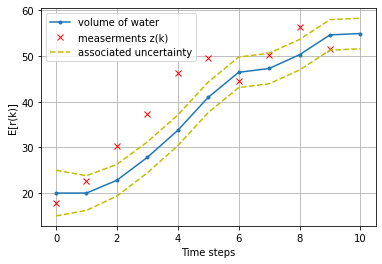

In [189]:
plt.plot(water_volume,'.-',label="volume of water")
plt.plot(measurements,'rx',label="measerments z(k)")
plt.plot(water_volume+np.sqrt(uncertainty),'y--',label="associated uncertainty")
plt.plot(water_volume-np.sqrt(uncertainty),'y--')
plt.ylabel('E[r(k)]')
plt.xlabel('Time steps')
plt.legend()
plt.grid(True)

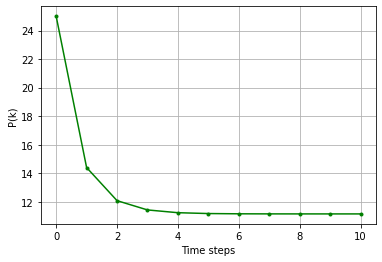

In [190]:
plt.plot(uncertainty,'g.-')
plt.ylabel('P(k)')
plt.xlabel('Time steps')
plt.grid(True)

In [191]:
d = np.mat([[1,-1],[0,1]]) # dynamics

mm = np.mat([[1,0]]) # measurement model

mnv = np.mat([[25]]) # measurement noise variance

ii = np.eye(2)

In [192]:
# At time k = 0, E[r(0)] = 20, E[c(0)] = 7... 
Er0 = np.mat([[20],[7]]) 

uf = np.mat([[10],[0]])
# Var [n(k)] = 0.1
process_uncertainty = np.mat([[0,0],[0,0.1]])
# sensor uncertainty is Var [w(k)] = 25, Var [c(0)] = 1
sensor_uncertainty = np.mat([[25,0],[0,1]])

In [193]:
water_volume = np.zeros([n_steps+1,2])

water_volume[0,0] = Er0[0,0]
water_volume[0,1] = Er0[1,0]

uncertainty = np.zeros([n_steps+1,2])

uncertainty[0,0] = sensor_uncertainty[0,0]
uncertainty[0,1] = sensor_uncertainty[1,1]

In [194]:
for k in range(1,n_steps+1):
    
    # Kalman filter prediction:
    Kp = d @ Er0 + uf
    # Kalman filter prediction uncertainty:
    K_uncertainty = d @ sensor_uncertainty @ d.T + process_uncertainty

    measurement = measurements[k-1]
    
    K = K_uncertainty @ mm.T @ np.linalg.inv(mm @ K_uncertainty @ mm.T + mnv)
    Er0 = Kp + K @ (measurement - mm @ Kp)
    sensor_uncertainty = (ii-K @ mm)@ K_uncertainty @(ii-K @ mm).T + K @ mnv @ K.T
    
    # store the variables for plotting:
    water_volume[k,0] = Er0[0,0]
    water_volume[k,1] = Er0[1,0]
    
    uncertainty[k,0] = sensor_uncertainty[0,0]
    uncertainty[k,1] = sensor_uncertainty[1,1]

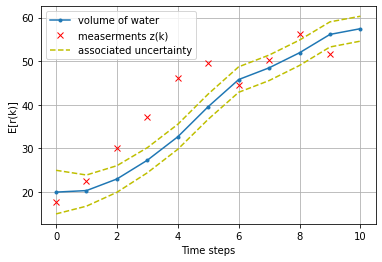

In [195]:
plt.plot(water_volume[:,0],'.-',label="volume of water")
plt.plot(measurements,'rx',label="measerments z(k)")
plt.plot(water_volume[:,0]+np.sqrt(uncertainty[:,0]),'y--',label="associated uncertainty")
plt.plot(water_volume[:,0]-np.sqrt(uncertainty[:,0]),'y--')
plt.ylabel('E[r(k)]')
plt.xlabel('Time steps')
plt.legend()
plt.grid(True)

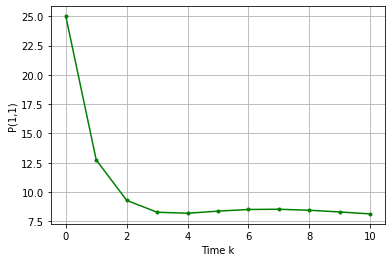

In [196]:
plt.plot(uncertainty[:,0],'g.-',label="P(k)(1,1)")
plt.xlabel('Time k')
plt.ylabel('P(1,1)')
plt.grid(True)

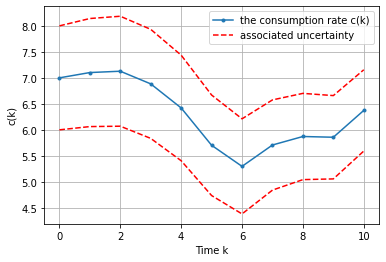

In [197]:

plt.plot(water_volume[:,1],'.-',label="the consumption rate c(k)")
plt.plot(water_volume[:,1]+np.sqrt(uncertainty[:,1]),'r--',label="associated uncertainty")
plt.plot(water_volume[:,1]-np.sqrt(uncertainty[:,1]),'r--')

plt.xlabel('Time k')
plt.ylabel('c(k)')
plt.grid(True)
plt.legend();

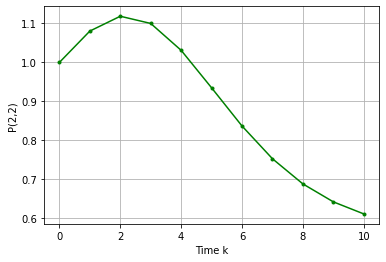

In [198]:
plt.plot(uncertainty[:,1],'g.-',label="P(k)(2,2)")
plt.xlabel('Time k')
plt.ylabel('P(2,2)')
plt.grid(True)

In [199]:
α = 0.3
d = np.matrix([[1-2*α, α, α, 0, -1, 0, 0, 0],
               [α, 1-2*α, α, 0, 0, -1, 0, 0],
               [α, α, 1-3*α, α, 0, 0, -1, 0],
               [0, 0, α, 1-α, 0, 0, 0, -1],
               [0, 0, 0, 0, 1, 0, 0, 0],
               [0, 0, 0, 0, 0, 1, 0, 0],
               [0, 0, 0, 0, 0, 0, 1, 0],
               [0,0,0,0,0,0,0,1]])

process_uncertainty=np.diag([0,0,0,0,0.1,0.1,0.1,0.1])

mm = np.eye(4,8)

mnv = np.eye(4)*25

In [200]:
z1 = np.array([59.3, 72, 64.4, 83.6, 84.9, 94.3, 84, 86.6, 89, 89.1])
z2 = np.array([39.1, 38.4, 36.2, 43.4, 50.5, 56.3, 40.3, 58.5, 55.4, 59.6])
z3 = np.array([31.1, 31.2, 41.6, 44.4, 41, 41.9, 39.2, 46.3, 43.3, 45.3])
z4 = np.array([38.6, 38, 32.6, 18, 29.4, 23.3, 11, 14.6, 18.4, 20.5])

list_of_measurements = [z1,z2,z3,z4]
measurements = np.mat(list_of_measurements)

In [201]:
Er0 = np.mat([[20],[40],[60],[20],[7],[7],[7],[7]])

sensor_uncertainty= np.diag([20,20,20,20,1,1,1,1])

uf = [[30],[0],[0],[0],[0],[0],[0],[0]]

In [202]:
water_volume = np.zeros([n_steps+1,8])  

uncertainty = np.zeros([n_steps+1,8]) 

for i in range(8):
    water_volume[0,i] = Er0[i,0]
    uncertainty[0,i] = sensor_uncertainty[i,i]

In [203]:
for k in np.arange(1,n_steps+1):
    
    Kp = d @ Er0 + uf
    K_uncertainty = d @ sensor_uncertainty @ d.T + process_uncertainty
    
    measurement = measurements[:,k-1]
    
    K = K_uncertainty @ mm.T @ np.linalg.inv(mm @ K_uncertainty @ mm.T + mnv)
    Er0 = Kp + K @ (measurement - mm @ Kp)
    sensor_uncertainty = (np.eye(8) - K @ mm) @ K_uncertainty @ (np.eye(8) - K @ mm).T + K @ mnv @ K.T
        
    for i in range(8):
        water_volume[k,i] = Er0[i,0]
        uncertainty[k,i] = sensor_uncertainty[i,i]


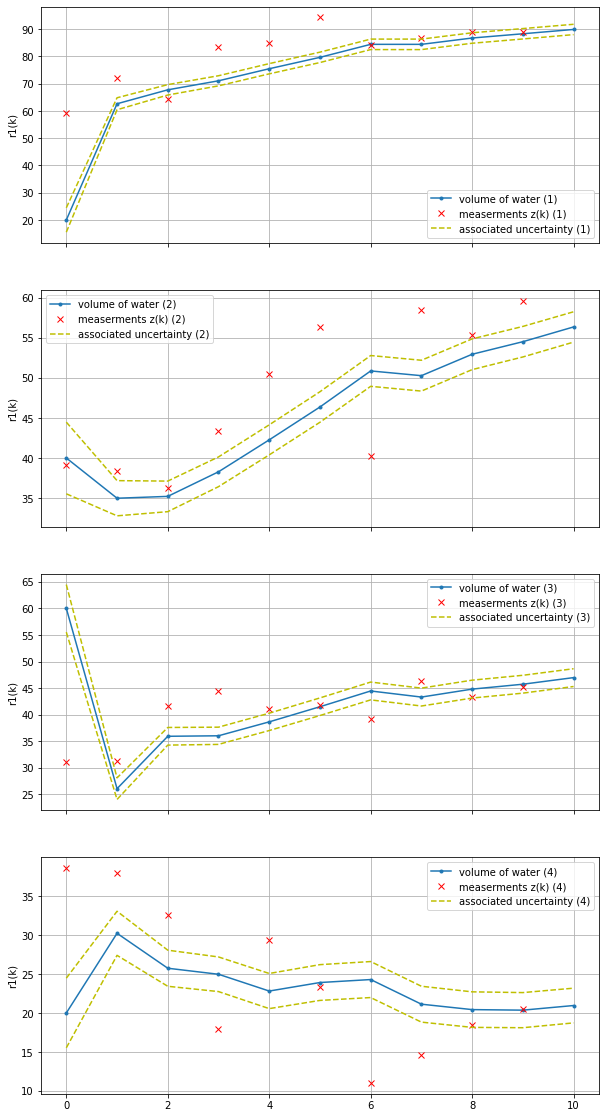

In [204]:
fig, ax = plt.subplots(4,1,sharex=True)
fig.set_size_inches(10,20)

for n in range(4):

    ax[n].plot(water_volume[:,n],'.-',label=f"volume of water ({n+1})")
    ax[n].plot(list_of_measurements[n],'rx',label=f"measerments z(k) ({n+1})")
    ax[n].plot(water_volume[:,n]+np.sqrt(uncertainty[:,n]),'y--',label=f"associated uncertainty ({n+1})")
    ax[n].plot(water_volume[:,n]-np.sqrt(uncertainty[:,n]),'y--',)
    
    ax[n].set_ylabel('r1(k)')
    ax[n].legend()
    ax[n].grid(True)

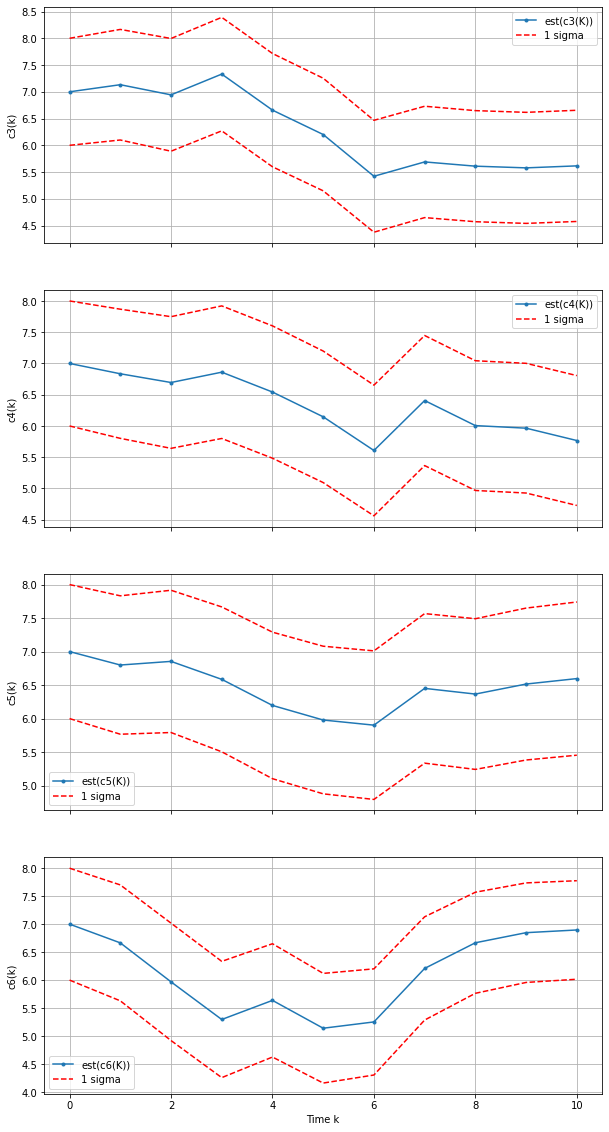

In [205]:
fig, ax = plt.subplots(4,1,sharex=True)
fig.set_size_inches(10,20)

for n in range(4):
    
    ax[n].plot(water_volume[:,n+4],'.-',label=f"est(c{n+3}(K))")
    ax[n].plot(water_volume[:,n+4]+np.sqrt(uncertainty[:,n+4]),'r--',label="1 sigma")
    ax[n].plot(water_volume[:,n+4]-np.sqrt(uncertainty[:,n+4]),'r--',)

    ax[3].set_xlabel('Time k')
    ax[n].set_ylabel(f'c{n+3}(k)')
    ax[n].legend()
    ax[n].grid(True)

In [206]:
uncertainties = [np.zeros([n_steps+1,1]),np.zeros([n_steps+1,1]),np.zeros([n_steps+1,1]),np.zeros([n_steps+1,1])]  

for i in range(4):

    uncertainties[i][0,0] = sensor_uncertainty[0,0]

for s in np.arange(1,n_steps+1):
    
    K_uncertainty = d @ sensor_uncertainty @ d.T + process_uncertainty

    K = K_uncertainty @ mm.T @ np.linalg.inv(mm @ K_uncertainty @ mm.T + mnv)
    sensor_uncertainty = (np.eye(8) - K @ mm) @ K_uncertainty @ (np.eye(8) - K @ mm).T + K @ mnv @ K.T
        
    for i in range(4):
        uncertainties[i][s,0] = sensor_uncertainty[i,i]  


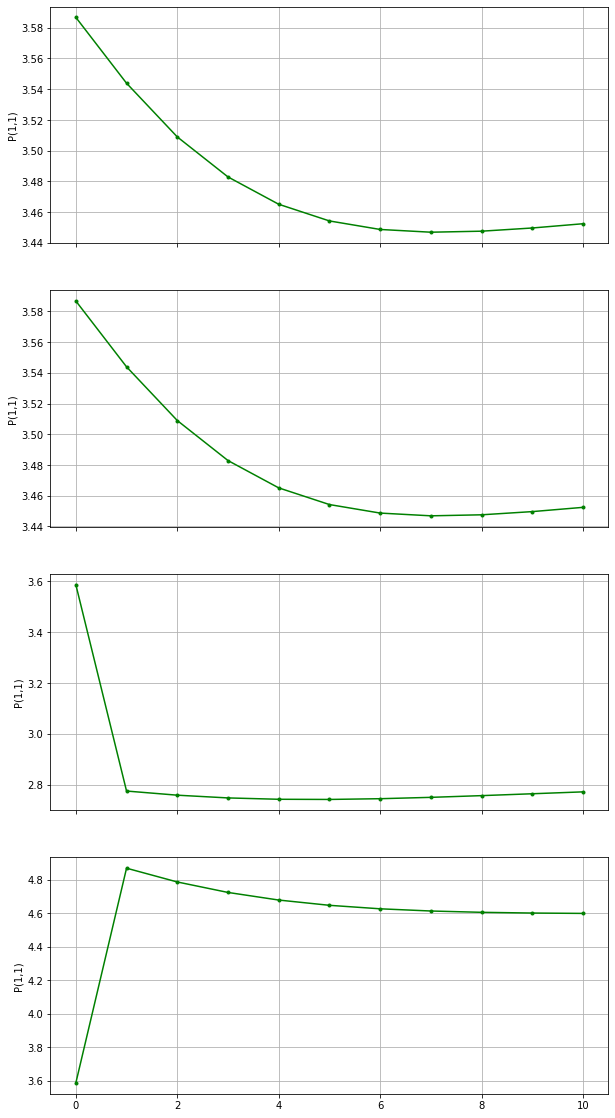

In [207]:
fig, ax = plt.subplots(4,1,sharex=True)
fig.set_size_inches(10,20)

for n in range(4):

    ax[n].plot(uncertainties[n][:,0],'g.-',label="P(1,1)")
    ax[n].set_ylabel('P(1,1)')
    ax[n].grid(True)

In [208]:
for i in range(4):
    print(1+i,':')
    print(uncertainties[i][:,0])


1 :
[3.58678078 3.54391255 3.50896257 3.4828954  3.46511245 3.45425204
 3.44870439 3.4469224  3.44758705 3.44967182 3.45244104]
2 :
[3.58678078 3.54391255 3.50896257 3.4828954  3.46511245 3.45425204
 3.44870439 3.4469224  3.44758705 3.44967182 3.45244104]
3 :
[3.58678078 2.77486303 2.75857296 2.74780805 2.74249816 2.74184656
 2.74474987 2.75007506 2.75682296 2.76420467 2.77165648]
4 :
[3.58678078 4.86927961 4.78708804 4.72452577 4.67915383 4.64770437
 4.62687624 4.61374186 4.60591418 4.60157046 4.59939703]


In [209]:
mm = np.eye(3,8) # measurement model

mnv = np.eye(3)*25 # measurement noise variance

In [210]:
list_of_measurements = [z1,z2,z4]
measurements = np.mat(list_of_measurements)

In [212]:
for k in np.arange(1,n_steps+1):

    Kp = d @ Er0 + uf
    K_uncertainty = d @ sensor_uncertainty @ d.T + process_uncertainty
    
    measurement = measurements[:,k-1]
    
    K = K_uncertainty @ mm.T @ np.linalg.inv(mm @ K_uncertainty @ mm.T + mnv)
    Er0 = Kp + K @ (measurement - mm @ Kp)
    sensor_uncertainty = (np.eye(8) - K @ mm) @ K_uncertainty @ (np.eye(8) - K @ mm).T + K @ mnv @ K.T
        
    for i in range(8):
        water_volume[k,i] = Er0[i,0]
        uncertainty[k,i] = sensor_uncertainty[i,i]


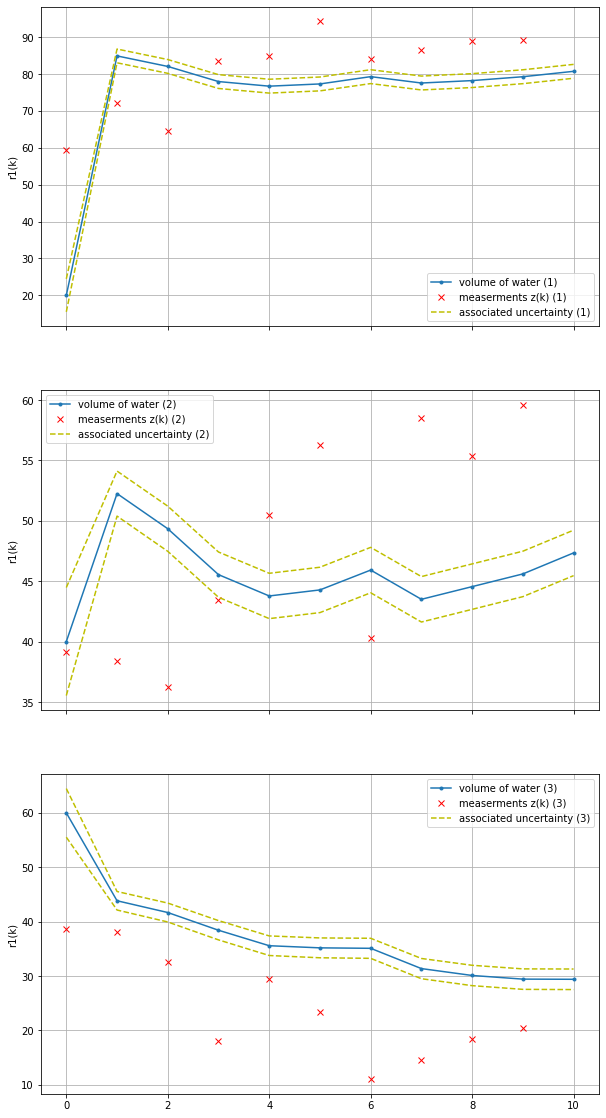

In [213]:
fig, ax = plt.subplots(3,1,sharex=True)
fig.set_size_inches(10,20)

for n in range(3):

    ax[n].plot(water_volume[:,n],'.-',label=f"volume of water ({n+1})")
    ax[n].plot(list_of_measurements[n],'rx',label=f"measerments z(k) ({n+1})")
    ax[n].plot(water_volume[:,n]+np.sqrt(uncertainty[:,n]),'y--',label=f"associated uncertainty ({n+1})")
    ax[n].plot(water_volume[:,n]-np.sqrt(uncertainty[:,n]),'y--',)
    
    ax[n].set_ylabel('r1(k)')
    ax[n].legend()
    ax[n].grid(True)

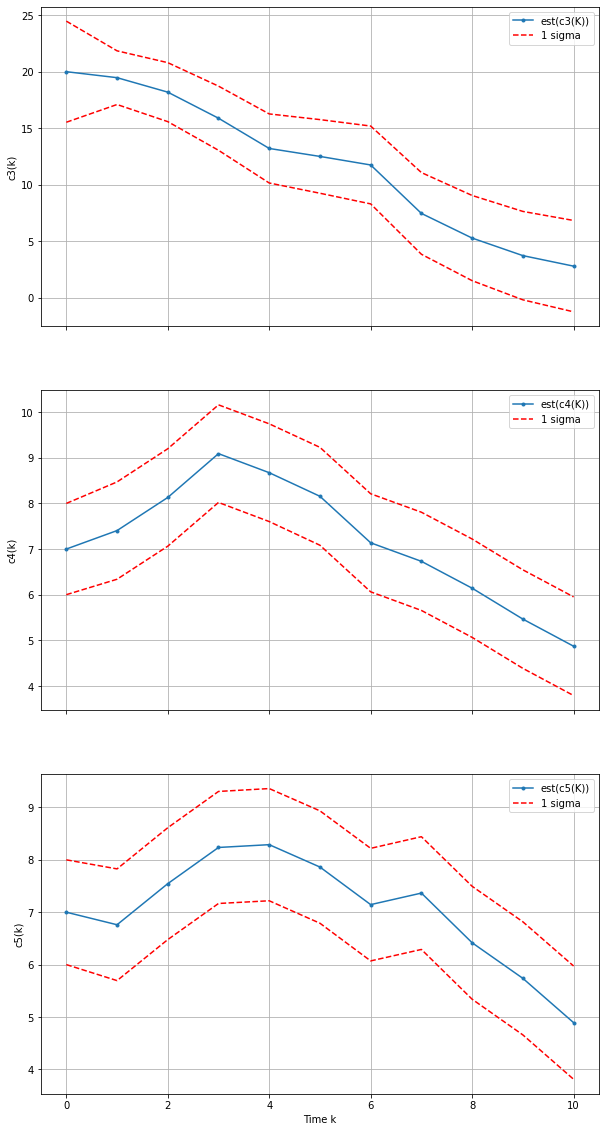

In [214]:
fig, ax = plt.subplots(3,1,sharex=True)
fig.set_size_inches(10,20)

for n in range(3):
    
    ax[n].plot(water_volume[:,n+3],'.-',label=f"est(c{n+3}(K))")
    ax[n].plot(water_volume[:,n+3]+np.sqrt(uncertainty[:,n+3]),'r--',label="1 sigma")
    ax[n].plot(water_volume[:,n+3]-np.sqrt(uncertainty[:,n+3]),'r--',)

    ax[2].set_xlabel('Time k')
    ax[n].set_ylabel(f'c{n+3}(k)')
    ax[n].legend()
    ax[n].grid(True)

In [215]:
uncertainties = [np.zeros([n_steps+1,1]),np.zeros([n_steps+1,1]),np.zeros([n_steps+1,1])]  

for i in range(3):
    uncertainties[i][0,0] = sensor_uncertainty[0,0]

for s in np.arange(1,n_steps+1):
    
    K_uncertainty = d @ sensor_uncertainty @ d.T + process_uncertainty

    K = K_uncertainty @ mm.T @ np.linalg.inv(mm @ K_uncertainty @ mm.T + mnv)
    sensor_uncertainty = (np.eye(8) - K @ mm) @ K_uncertainty @ (np.eye(8) - K @ mm).T + K @ mnv @ K.T
        
    for i in range(3):
        uncertainties[i][s,0] = sensor_uncertainty[i,i]  


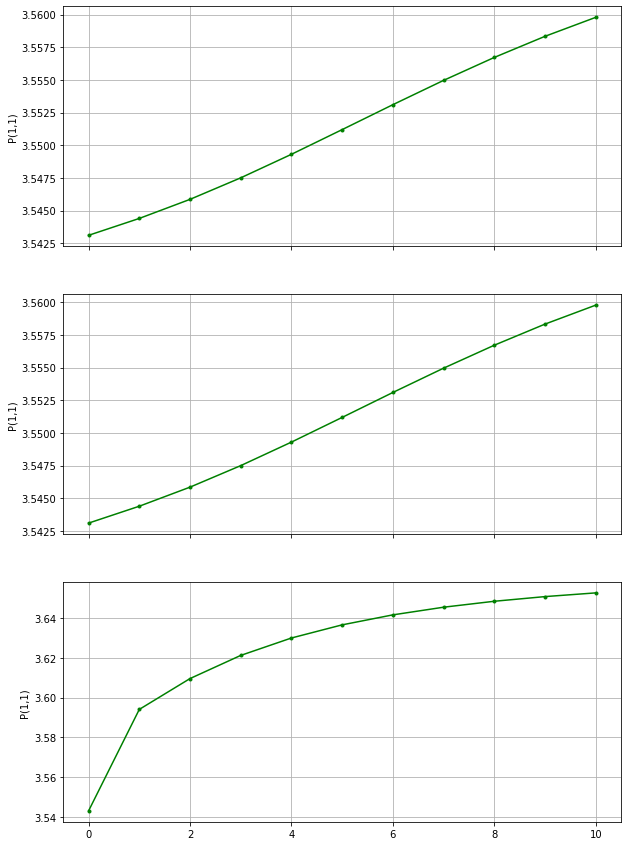

In [218]:
fig, ax = plt.subplots(3,1,sharex=True)
fig.set_size_inches(10,15)

for n in range(3):

    ax[n].plot(uncertainties[n][:,0],'g.-',label="P(1,1)")

    ax[n].set_ylabel('P(1,1)')
    ax[n].grid(True)

In [217]:
for i in range(3):
    print(1+i,':')
    print(uncertainties[i][:,0])

1 :
[3.54310441 3.54439725 3.54585696 3.54750479 3.5493059  3.55119673
 3.55310543 3.55496532 3.55672244 3.5583385  3.55979079]
2 :
[3.54310441 3.54439725 3.54585696 3.54750479 3.5493059  3.55119673
 3.55310543 3.55496532 3.55672244 3.5583385  3.55979079]
3 :
[3.54310441 3.594111   3.60960955 3.62125136 3.63000331 3.63660853
 3.64162738 3.64547634 3.64846159 3.65080658 3.65267365]
